In [1]:
import dill
import numpy as np
import sys
import os
import pandas as pd
np.set_printoptions(threshold=sys.maxsize)


In [2]:
DPC_df = pd.read_csv("all_data_daily.csv", names=["date-time", "Mean-Energy-Consumed"], header=0)

In [3]:
DPC_df.tail()

,date-time,Mean-Energy-Consumed
824,2014-02-24 23:30:00,0.216976
825,2014-02-25 23:30:00,0.214890
826,2014-02-26 23:30:00,0.212949
827,2014-02-27 23:30:00,0.215866
828,2014-02-28 00:00:00,0.208997


In [4]:
DPC_df = DPC_df.fillna(method='ffill')

In [5]:
DPC_df.plot()

In [6]:
data = np.array(DPC_df["Mean-Energy-Consumed"])

In [7]:
train_test_ratio = 0.8
data_train = data[0:int(data.shape[0]*train_test_ratio)]

In [8]:
data_test = data[int(data.shape[0]*train_test_ratio):]
data_test.shape[0]

166

In [9]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#np.seterr(divide='ignore', invalid='ignore')
scaler2 = StandardScaler()
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(np.reshape(data_train,(data_train.shape[0],1)))
normalized_data = scaler2.fit_transform(normalized_data)

inverseTcheck = scaler2.inverse_transform(normalized_data)
inverseTcheck = scaler.inverse_transform(inverseTcheck)

In [10]:
normalized_data_test = scaler.transform(np.reshape(data_test,(data_test.shape[0],1)))
normalized_data_test = scaler2.transform(normalized_data_test)

In [11]:
normalized_data_test.shape

(166, 1)

In [12]:
normalized_data.shape

(663, 1)

In [13]:
max(normalized_data)

array([2.8163578])

In [14]:
len(normalized_data)

663

In [15]:
lag = 30
#shift time series data 30 days a ahead
interval_train = 30
x_train = [normalized_data[i:i+interval_train] for i in range(0,len(normalized_data) - lag)]
target = normalized_data[lag:]

In [16]:
normalized_data_test
x_test = [normalized_data_test[i:i+interval_train] for i in range(0,len(normalized_data_test) - lag)]
target_test = normalized_data_test[lag:]

In [17]:
print(target.shape)
print(target_test.shape)
print(len(x_train))
len(x_test)

(633, 1)
(136, 1)
633


136

In [18]:
np_x_train = np.array(x_train)
np_x_test = np.array(x_test)

In [19]:
np_x_train.shape
np_x_test.shape

(136, 30, 1)

In [20]:
x_train2=np_x_train
y_train2=target

In [21]:
print(x_train2.shape)
print(y_train2.shape)
print(x_train2.shape[2])

(633, 30, 1)
(633, 1)
1


In [22]:
x_train2.shape[1:]

(30, 1)

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
import cartopy.crs as ccrs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import tensorflow.keras as keras
import types
import tempfile
import os

In [24]:
from keras.initializers import glorot_uniform  # Or your initializer of choice
import keras.backend as K


initial_weights = model.get_weights()

backend_name = K.backend()
if backend_name == 'tensorflow': 
    k_eval = lambda placeholder: placeholder.eval(session=K.get_session())
elif backend_name == 'theano': 
    k_eval = lambda placeholder: placeholder.eval()
else: 
    raise ValueError("Unsupported backend")

new_weights = [k_eval(glorot_uniform()(w.shape)) for w in initial_weights]

model.set_weights(new_weights)

Using TensorFlow backend.


NameError: name 'model' is not defined

In [25]:

model = Sequential()
model.add(LSTM(128, input_shape= x_train2.shape[1:], activation='tanh', return_sequences=True))
#model.add(LSTM(100, input_shape= (x_train2.shape[1:]), activation='sigmoid', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(y_train2.shape[1], activation='tanh'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           66560     
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________

In [26]:
opt = tf.keras.optimizers.Adamax(learning_rate=1, beta_1=0.9, beta_2=0.999)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
#opt = tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
#opt = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)

model.compile(
    loss='mean_absolute_error',
    optimizer='adam',
    metrics=['mae'],
)

model.fit(x_train2,
          y_train2,
          epochs=30)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 633 samples
Epoch 1/30
633/633 [==============================] - 3s 5ms/sample - loss: 0.3567 - mean_absolute_error: 0.3567
Epoch 2/30
633/633 [==============================] - 1s 2ms/sample - loss: 0.2739 - mean_absolute_error: 0.2739
Epoch 3/30
633/633 [==============================] - 1s 2ms/sample - loss: 0.2692 - mean_absolute_error: 0.2692
Epoch 4/30
633/633 [==============================] - 1s 2ms/sample - loss: 0.2655 - mean_absolute_error: 0.2655
Epoch 5/30
633/633 [==============================] - 2s 2ms/sample - loss: 0.2633 - mean_absolute_error: 0.2633
Epoch 6/30
633/633 [==============================] - 2s 2ms/sample - loss: 0.2558 - mean_absolute_error: 0.2558
Epoch 7/30
633/633 [==============================] - 2s 2ms/sample - loss: 0.2583 - mean_absolute_error: 0.2583
Epoch 8/30
633/633 [==============================] - 2s 2ms/sample - loss: 0.2601 - mean_abso

# Training Set Evaluation

In [27]:
pred = model.predict(x_train2)
data_out = scaler.inverse_transform(scaler2.inverse_transform(pred))

In [28]:
data_out.shape

(633, 1)

In [29]:
x_train2_raw = scaler.inverse_transform(scaler2.inverse_transform(x_train2[:,29,:]))

In [30]:
x_train2_raw = np.append(x_train2_raw,[None])

In [31]:
np.reshape(x_train2_raw,(x_train2_raw.shape[0],1)).shape

(634, 1)

In [32]:
trained_pred = np.insert(data_out, 0, [None], axis=0)

In [33]:
trained_pred.shape

(634, 1)

In [34]:
data_out_df = pd.DataFrame(np.hstack([np.reshape(x_train2_raw,(x_train2_raw.shape[0],1)),trained_pred]), columns=["actual", "modeled"])

In [35]:
data_out_df

,actual,modeled
0,0.252546,NaN
1,0.258115,0.255999
2,0.272254,0.256333
3,0.271185,0.25668
4,0.230558,0.256644
...,...,...
629,0.184571,0.176663
630,0.17872,0.178589
631,0.184263,0.178778
632,0.19384,0.180667


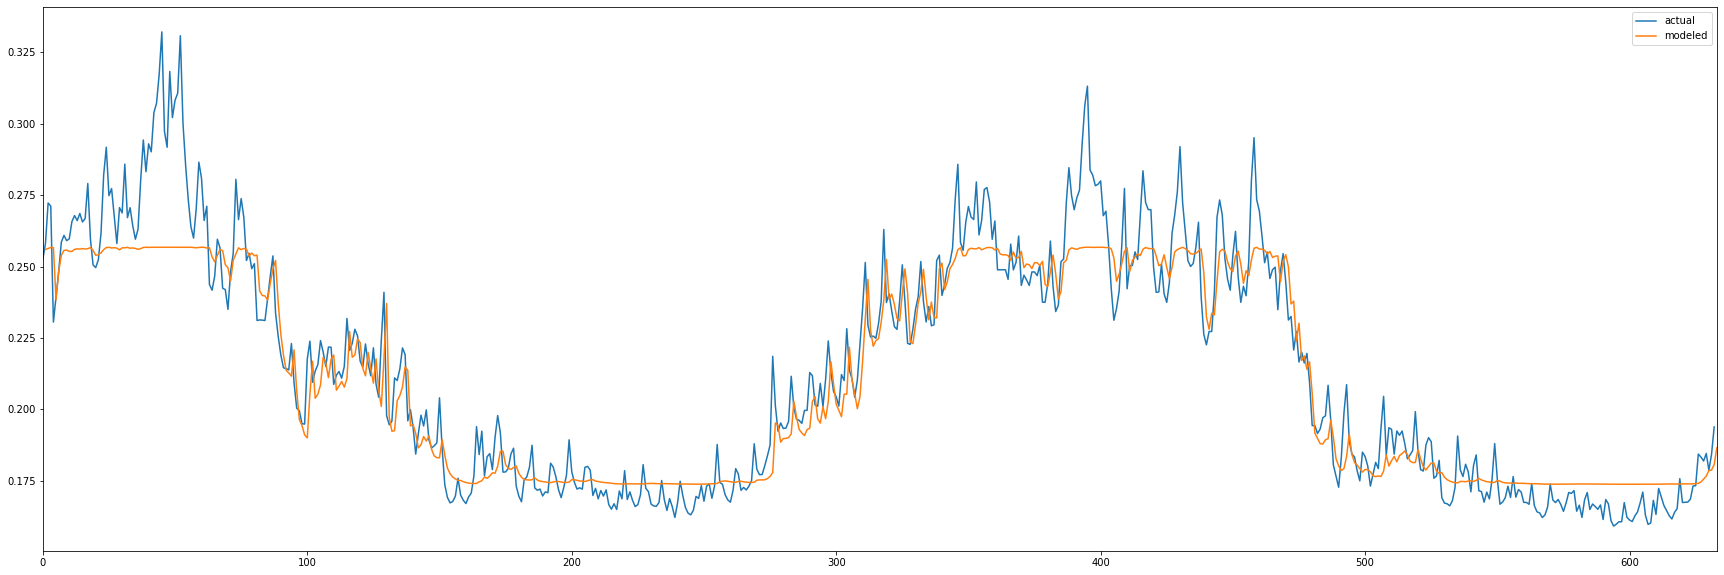

In [36]:
data_out_df.plot(figsize=(30,10))

In [37]:
Train_residuals = x_train2_raw[:-1] - trained_pred[1:].ravel()

In [38]:
Train_residuals_series = pd.to_numeric(pd.Series(Train_residuals))

In [39]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

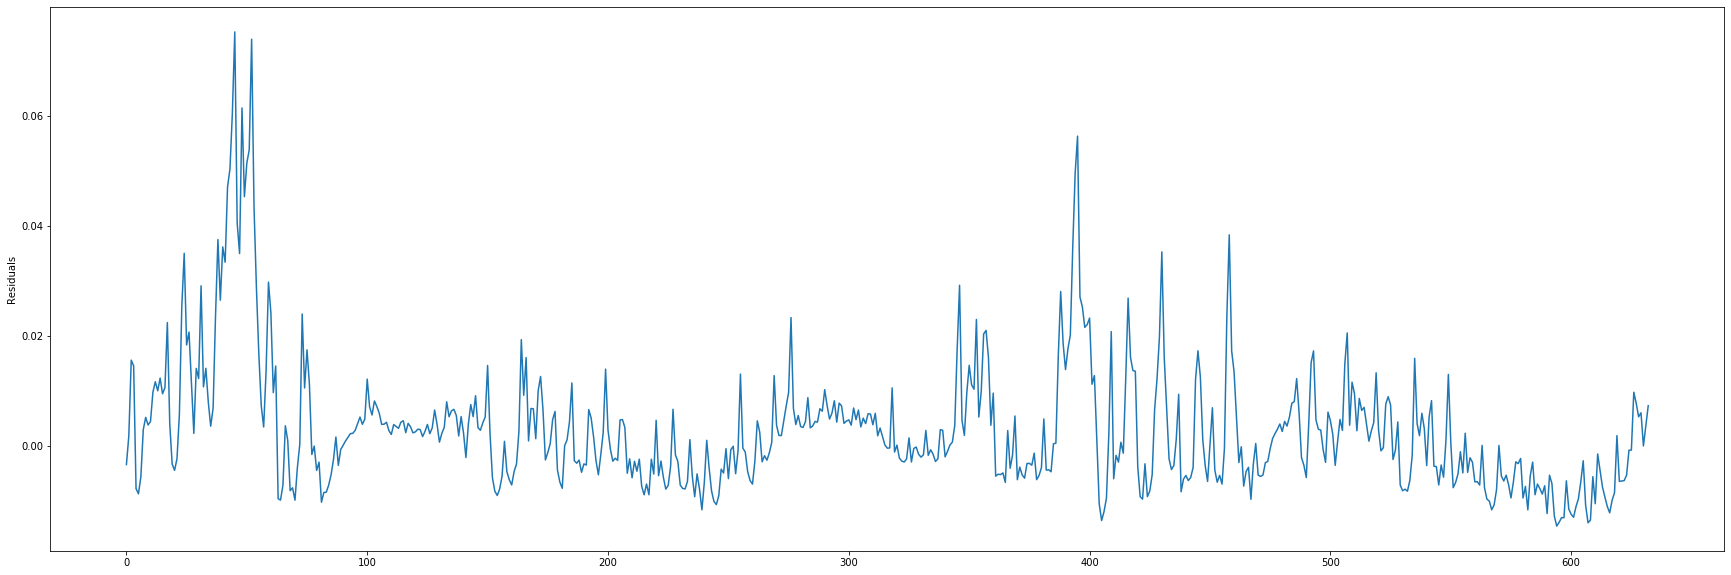

In [40]:
pyplot.figure(figsize=(30,10))
pyplot.plot(Train_residuals_series)
pyplot.ylabel('Residuals')
pyplot.show()

C:\Users\Zhimin90\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


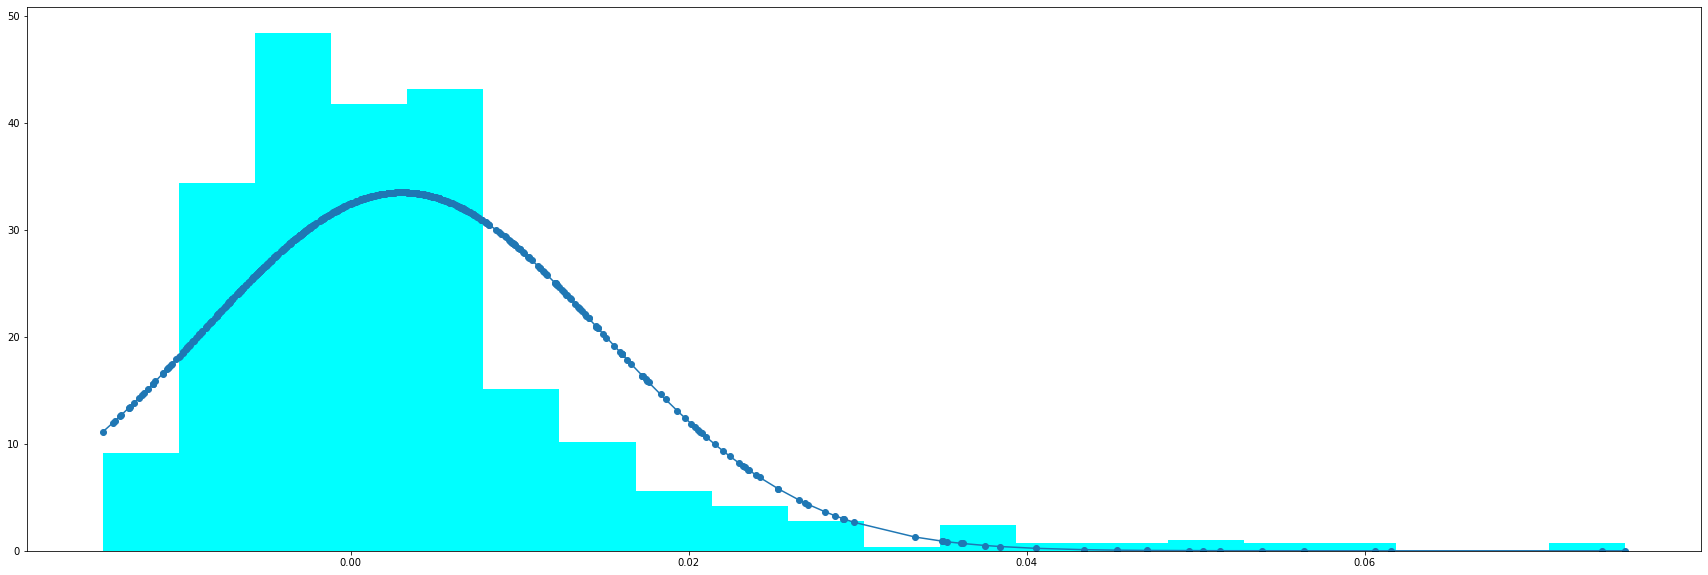

In [91]:
import scipy.stats as stats
import pylab as pl
h = sorted(Train_residuals_series)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
pl.figure(figsize=(30,10))
pl.plot(h, fit, "-o")
pl.hist(h,normed=True, bins=20, color="cyan")      #use this to draw histogram of your data
pl.show()   

In [41]:
import matplotlib as mpl

<Figure size 2160x720 with 0 Axes>

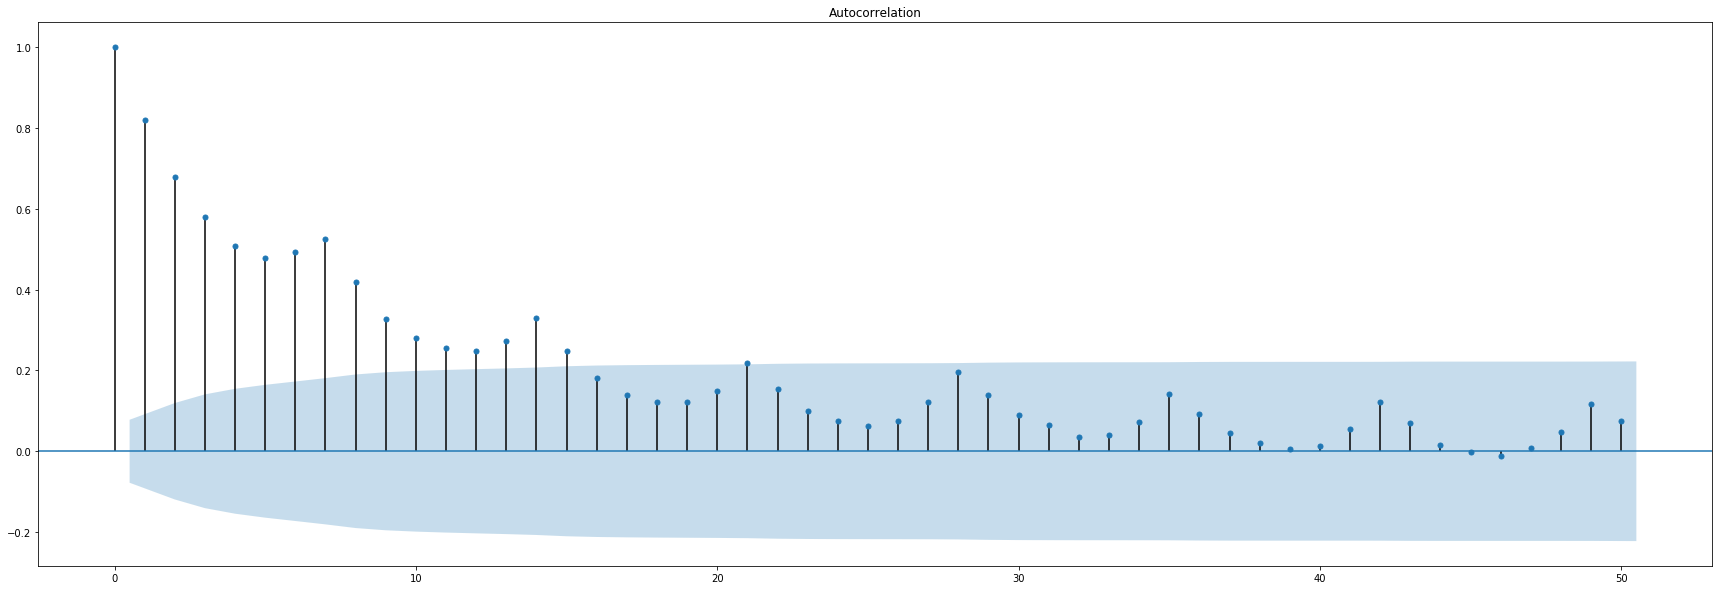

In [42]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(30,10))
    pyplot.figure(figsize=(30,10))
    plot_acf(Train_residuals_series, lags=50)
    pyplot.show()

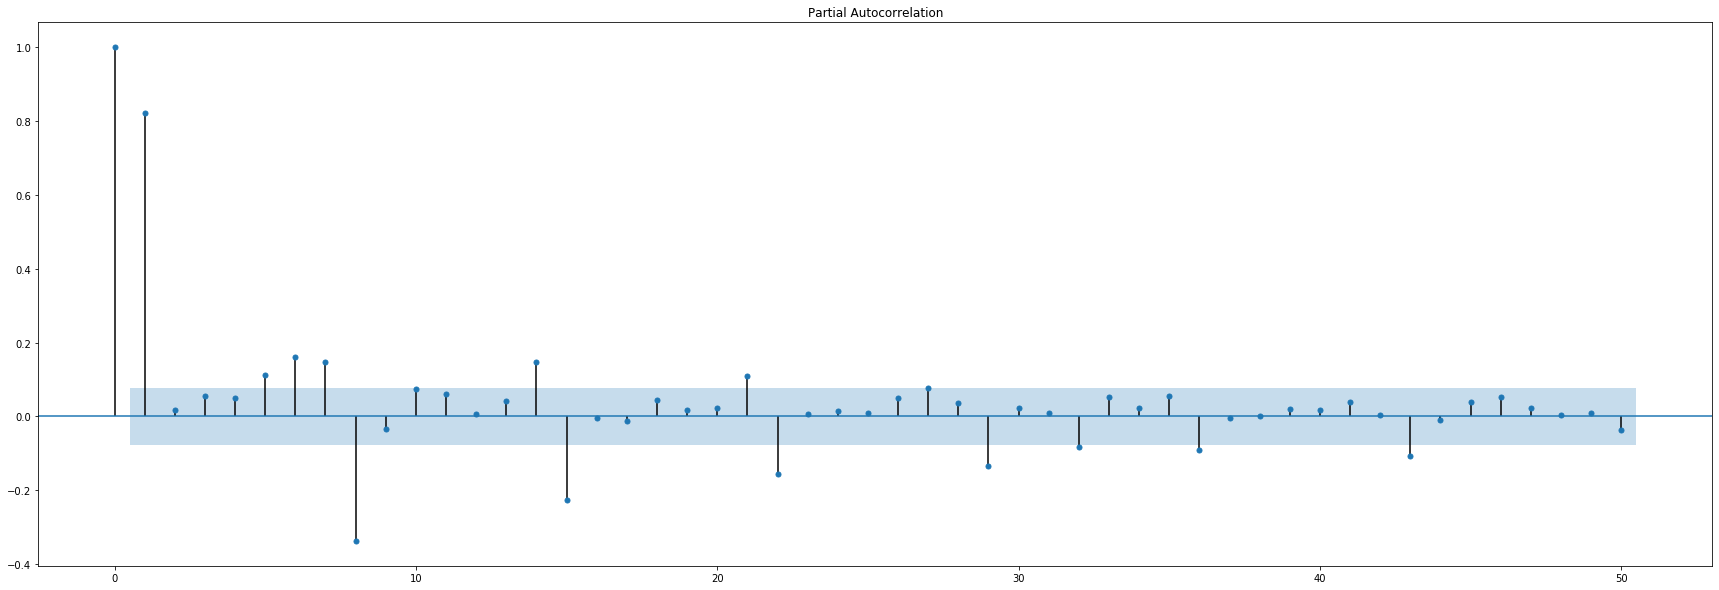

In [43]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(30,10))
    plot_pacf(Train_residuals_series, lags=50)
    pyplot.show()

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
Train_MAE = mean_absolute_error(x_train2_raw[:-1], trained_pred[1:].ravel())
Train_MAE

0.007949488866749553

In [46]:
Train_MAPE = np.mean(abs(Train_residuals/ x_train2_raw[:-1]))
Train_MAPE 

0.03514874798093317

In [47]:
Train_RMSE = np.sqrt(mean_squared_error(x_train2_raw[:-1], trained_pred[1:].ravel()))
Train_RMSE

0.012272447413608513

# Test Set Evaluation

In [48]:
np_x_test.shape

(136, 30, 1)

In [49]:
pred_test = model.predict(np_x_test)
data_out_pred_test = scaler.inverse_transform(scaler2.inverse_transform(pred_test))

In [50]:
max(data_out_pred_test)

array([0.25491846], dtype=float32)

In [51]:
data_out_pred_test.shape

(136, 1)

In [52]:
np_x_test[:,29].shape

(136, 1)

In [53]:
org_x_test = scaler.inverse_transform(scaler2.inverse_transform(np_x_test[:,29]))

In [54]:
pred_test_shift1day_ahead =  np.insert(data_out_pred_test, 0, [None], axis=0)
print(pred_test_shift1day_ahead.shape)

(137, 1)


In [55]:
data_out_test_df = pd.DataFrame(np.hstack([np.vstack((org_x_test,[None])),pred_test_shift1day_ahead]), columns=["actual","predicted"])

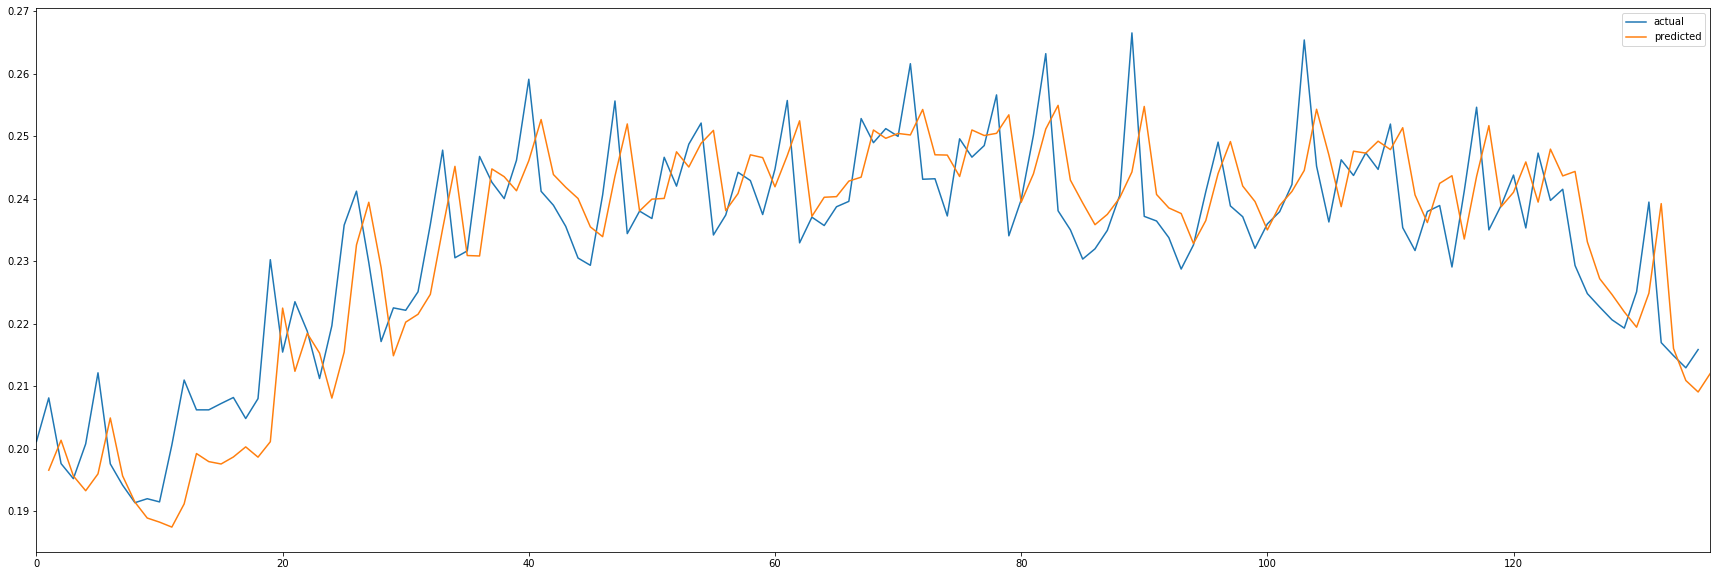

In [56]:
data_out_test_df.plot(figsize=(30,10))

In [57]:
Test_MAE = mean_absolute_error(np.vstack((org_x_test,[None]))[1:-1], pred_test_shift1day_ahead[1:-1])

In [58]:
Test_MAE 

0.007493533741058621

In [59]:
Test_residuals = np.vstack((org_x_test,[None]))[1:-1] - pred_test_shift1day_ahead[1:-1]

In [60]:
residual_plot = pd.DataFrame(np.hstack([Test_residuals, pred_test_shift1day_ahead[1:-1]]), columns=['residuals','pred'])

In [61]:
residuals_series = pd.to_numeric(pd.Series(Test_residuals[:,0]))

In [62]:
actualTest = np.vstack((org_x_test,[None]))[1:-1]

In [63]:
Test_MAPE = np.mean(abs(Test_residuals/actualTest))
Test_MAPE

0.03216852135570552

In [64]:
Test_RMSE = np.sqrt(mean_squared_error(np.vstack((org_x_test,[None]))[1:-1], pred_test_shift1day_ahead[1:-1]))
Test_RMSE

0.009477345605454055

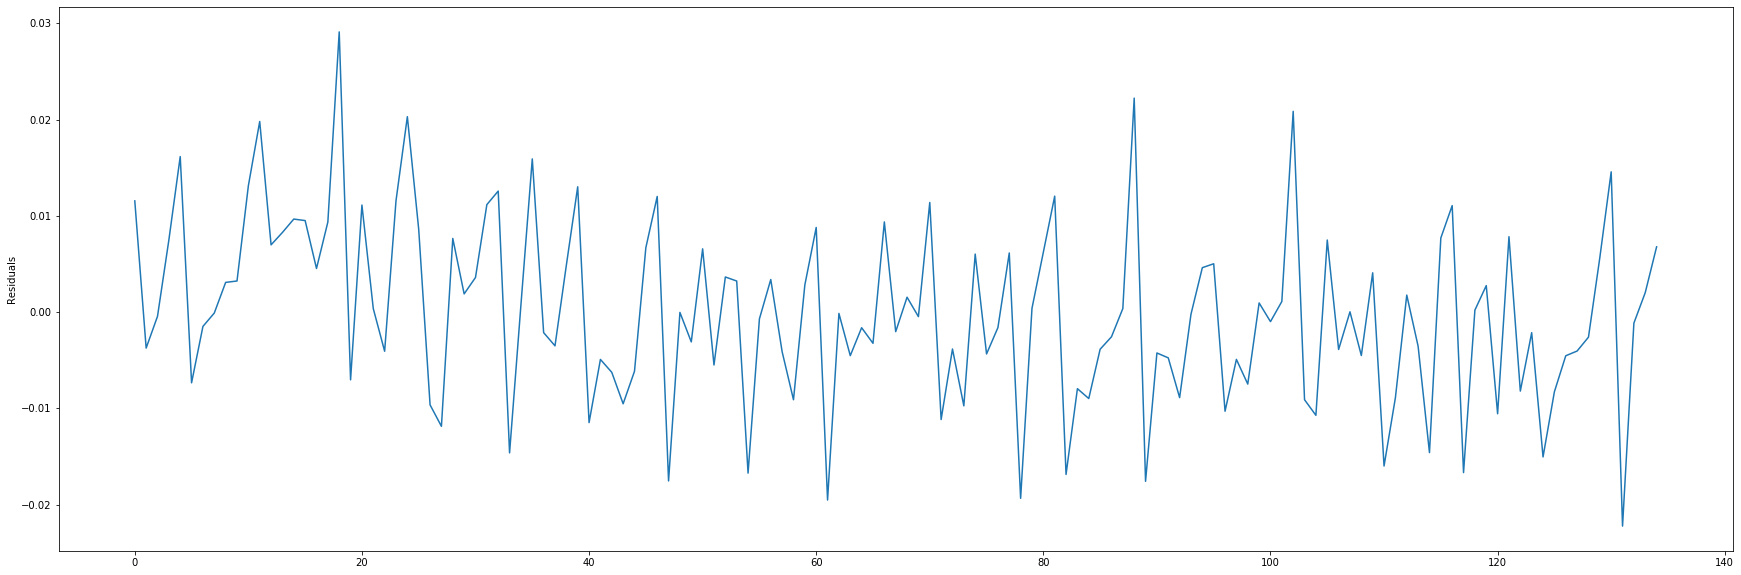

In [65]:
pyplot.figure(figsize=(30,10))
pyplot.plot(residuals_series)
pyplot.ylabel('Residuals')
pyplot.show()

C:\Users\Zhimin90\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


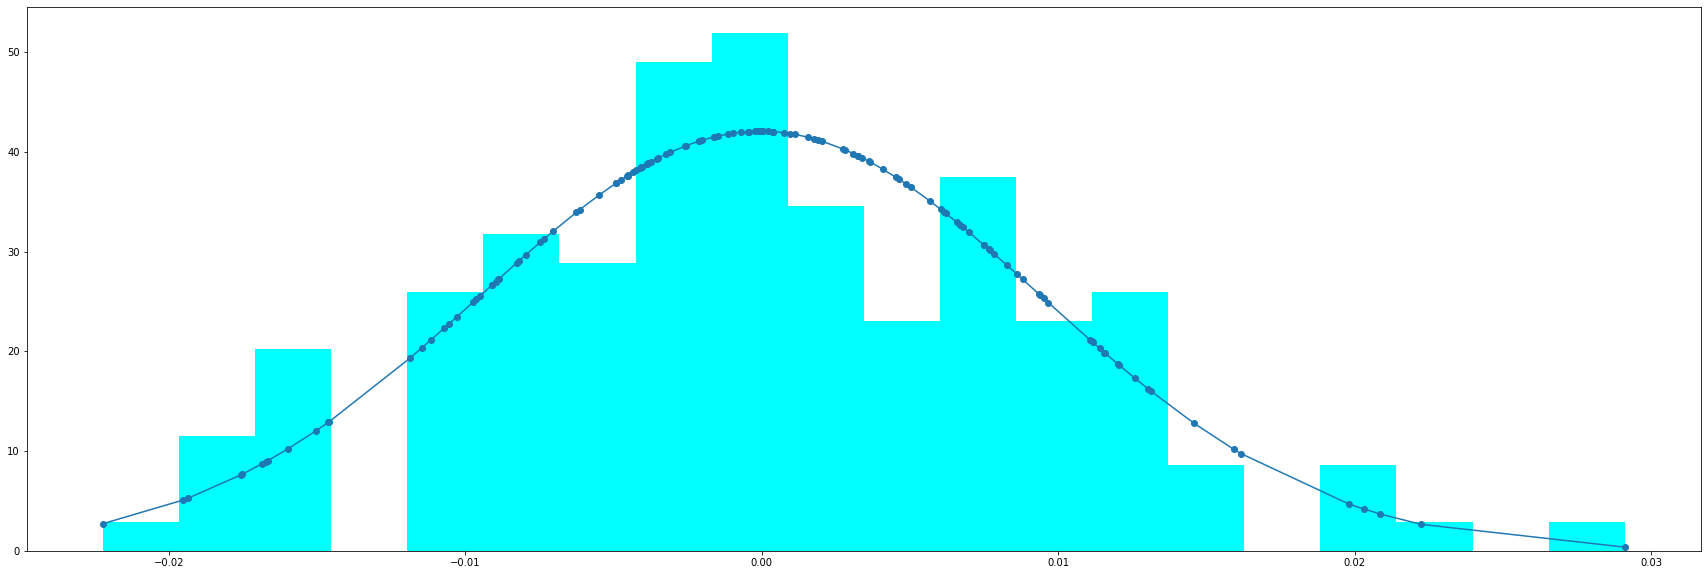

In [90]:
h = sorted(residuals_series)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
pl.figure(figsize=(30,10))
pl.plot(h, fit, "-o")
pl.hist(h,normed=True, bins=20, color="cyan")      #use this to draw histogram of your data
pl.show()   

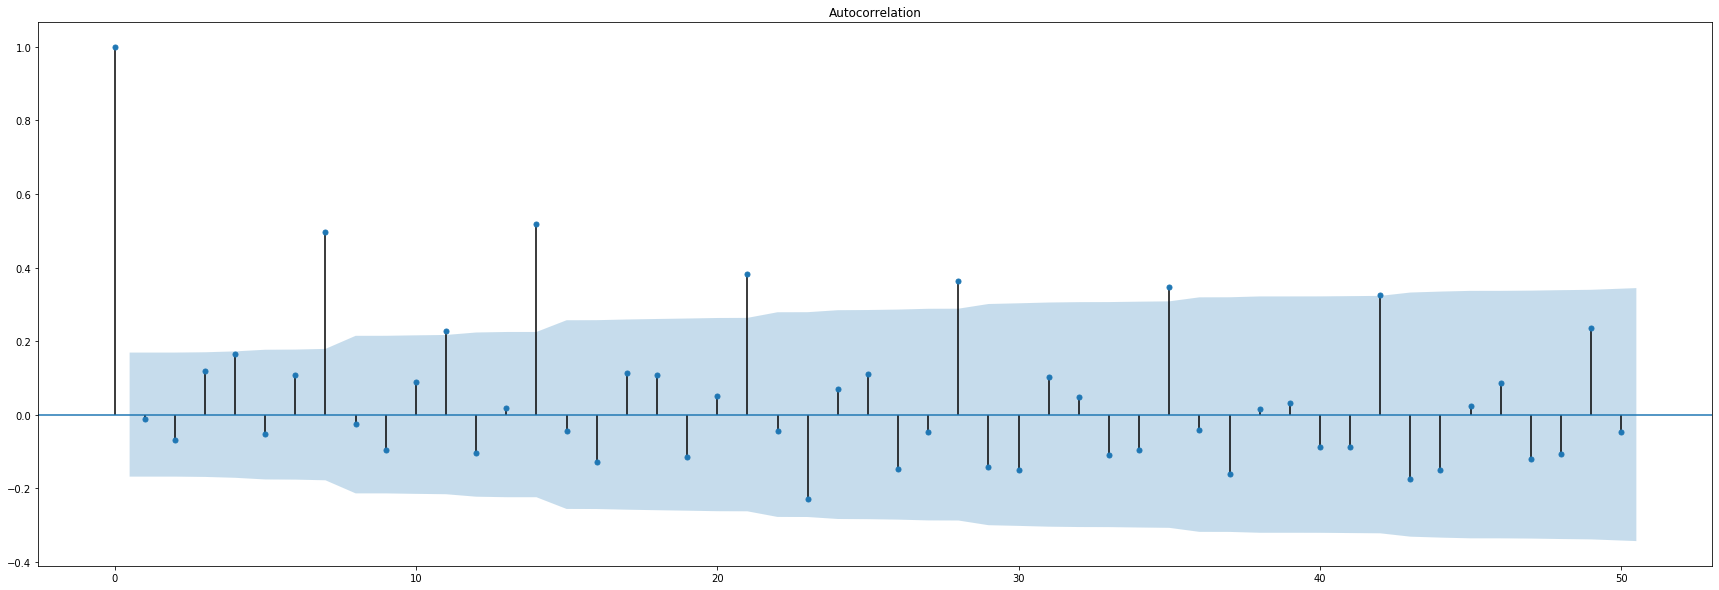

In [66]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(30,10))
    plot_acf(residuals_series, lags=50)
    pyplot.show()

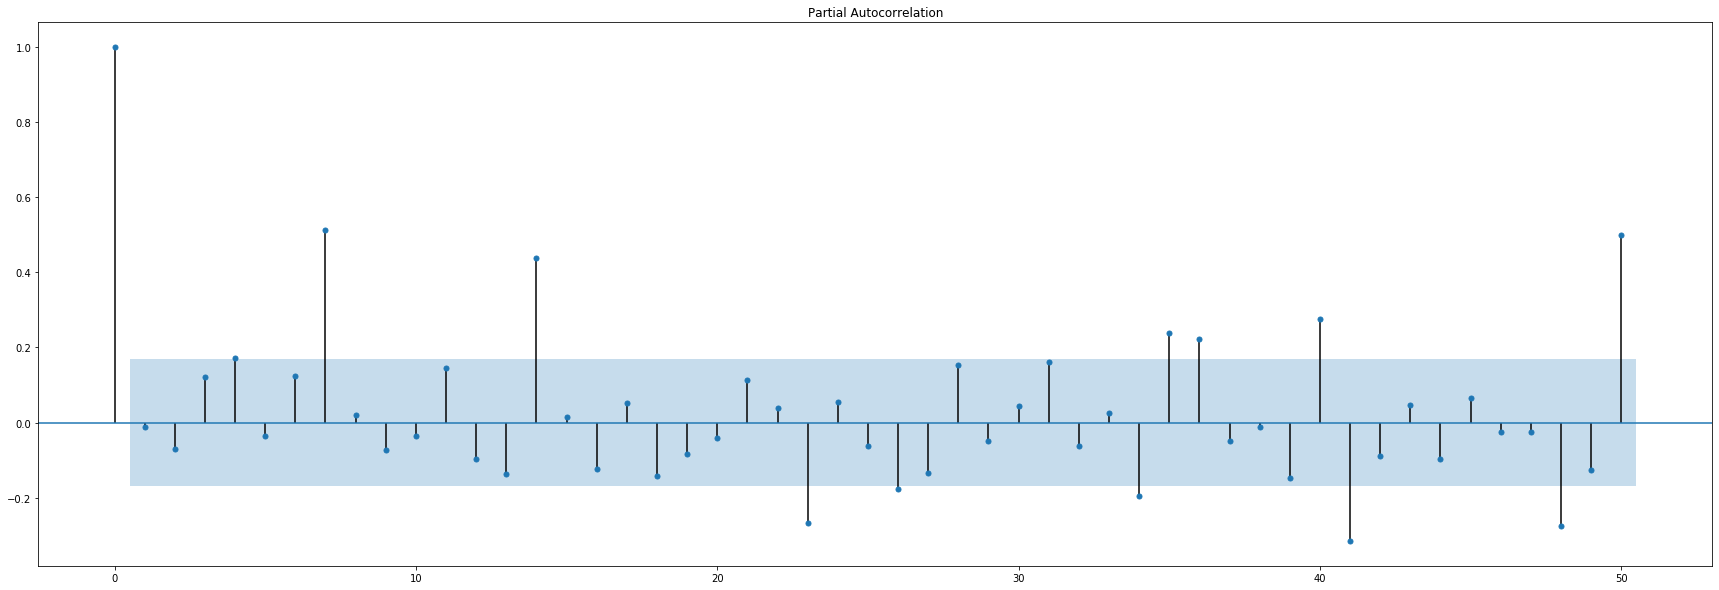

In [67]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(30,10))
    plot_pacf(residuals_series, lags=50)
    pyplot.show()
